# ARIMA MODEL IMPLEMENTATION ON STOCK DATASET

In [61]:
import pandas as pd
df = pd.read_csv("stocks.csv")
print(df.tail(5))

              date   open   high    low  close   volume Name
619035  2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS


In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None


In [63]:
# Calculate the total number of chunks
total_chunks = len(df) // 2000 + 1

# Split the DataFrame into chunks of 1000 values each
data_chunks = [df.iloc[i*2000:(i+1)*2000] for i in range(total_chunks)]

# Print the size of each chunk
for i, chunk in enumerate(data_chunks):
    print(f"Chunk {i+1}: {chunk.shape}")

# Access a specific chunk, for example, the first chunk
data = data_chunks[0]
print("\nFirst Chunk:")
print(data)


Chunk 1: (2000, 7)
Chunk 2: (2000, 7)
Chunk 3: (2000, 7)
Chunk 4: (2000, 7)
Chunk 5: (2000, 7)
Chunk 6: (2000, 7)
Chunk 7: (2000, 7)
Chunk 8: (2000, 7)
Chunk 9: (2000, 7)
Chunk 10: (2000, 7)
Chunk 11: (2000, 7)
Chunk 12: (2000, 7)
Chunk 13: (2000, 7)
Chunk 14: (2000, 7)
Chunk 15: (2000, 7)
Chunk 16: (2000, 7)
Chunk 17: (2000, 7)
Chunk 18: (2000, 7)
Chunk 19: (2000, 7)
Chunk 20: (2000, 7)
Chunk 21: (2000, 7)
Chunk 22: (2000, 7)
Chunk 23: (2000, 7)
Chunk 24: (2000, 7)
Chunk 25: (2000, 7)
Chunk 26: (2000, 7)
Chunk 27: (2000, 7)
Chunk 28: (2000, 7)
Chunk 29: (2000, 7)
Chunk 30: (2000, 7)
Chunk 31: (2000, 7)
Chunk 32: (2000, 7)
Chunk 33: (2000, 7)
Chunk 34: (2000, 7)
Chunk 35: (2000, 7)
Chunk 36: (2000, 7)
Chunk 37: (2000, 7)
Chunk 38: (2000, 7)
Chunk 39: (2000, 7)
Chunk 40: (2000, 7)
Chunk 41: (2000, 7)
Chunk 42: (2000, 7)
Chunk 43: (2000, 7)
Chunk 44: (2000, 7)
Chunk 45: (2000, 7)
Chunk 46: (2000, 7)
Chunk 47: (2000, 7)
Chunk 48: (2000, 7)
Chunk 49: (2000, 7)
Chunk 50: (2000, 7)
Chunk 51:

In [64]:
df['date'] = pd.to_datetime(data['date'])
data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [65]:
data.set_index('date', inplace=True)
print(data.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [66]:
print(data.head())


             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [67]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
result = adfuller(data['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.0074336795256689
p-value: 0.7505433904979313


The ADF statistic is negative, indicating some level of stationarity, the p-value is quite high (0.336),which suggests that
there is insufficient evidence to reject the null hypothesis of non-stationarity.Therefore, based on the ADF test results,
the data is likely non-stationary.

In [68]:
# Perform differencing to make the data stationary
data['close_diff'] = data['close'].diff()
data.dropna(inplace=True) 

# Perform ADF test for stationarity on the differenced series
result_diff = adfuller(data['close_diff'])
print('ADF Statistic (After differencing):', result_diff[0])
print('p-value (After differencing):', result_diff[1])


ADF Statistic (After differencing): -43.415990466362985
p-value (After differencing): 0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\1636790550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_diff'] = data['close'].diff()
C:\Users\DELL\AppData\Local\Temp\ipykernel_15684\1636790550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Drop the first NaN value resulting from differencing


The ADF Statistic value of -29.627 and a p-value of 0.0 indicate that the data is stationary after differencing.
This means that the time series has achieved stationarity

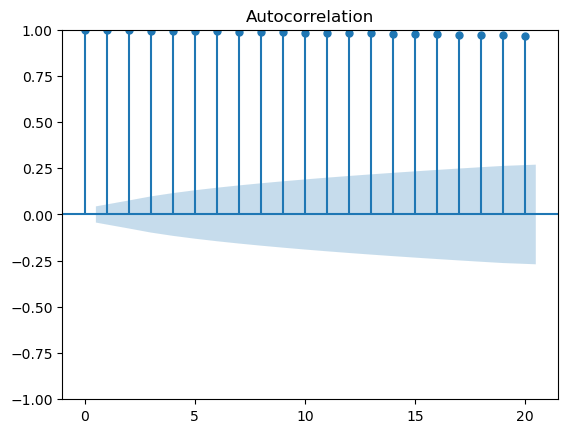

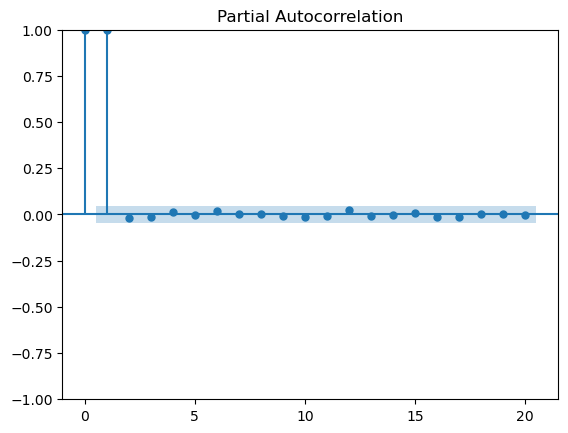

In [69]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(data['close'], lags=20)
plt.show()

# Plot PACF
plot_pacf(data['close'], lags=20)
plt.show()


# Testing ARIMA MODEL to check accuracy

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [70]:
# 1. Train-Test Split
train_size = int(len(data) * 0.8) 
train_data, test_data = data[:train_size], data[train_size:]
train_data.head(5)

,open,high,low,close,volume,Name,close_diff
date,,,,,,,
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.29
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.19
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.39
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.67
2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,0.51


In [71]:
test_data.head(5)

,open,high,low,close,volume,Name,close_diff
date,,,,,,,
2014-06-18,92.27,92.29,91.3500,92.18,33514108,AAPL,0.10
2014-06-19,92.29,92.30,91.3389,91.86,35527686,AAPL,-0.32
2014-06-20,91.85,92.55,90.9000,90.91,100898066,AAPL,-0.95
2014-06-23,91.32,91.62,90.6000,90.83,43694391,AAPL,-0.08
2014-06-24,90.75,91.74,90.1900,90.28,39036087,AAPL,-0.55


In [90]:
# 2. Fit the Model
order = (6, 2, 1)  # p, d, q
model = ARIMA(train_data['close'], order=order)
fitted_model = model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packa

In [91]:
# 3. Make Predictions
predictions = fitted_model.predict(start=len(train_data), end=len(data)-1, typ='levels')

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [92]:
# 4. Evaluate Predictions
mse = mean_squared_error(test_data['close'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 15.374185076942808


In [93]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['close'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) (already calculated in the previous code snippet)
mse = mean_squared_error(test_data['close'], predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 12.53698197757926
Mean Squared Error (MSE): 236.36556678009094
Root Mean Squared Error (RMSE): 15.374185076942808


The lower values of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) indicate
improved model accuracy and better predictive performance, suggesting that the model's forecasts are closer to the actual
values, resulting in smaller prediction errors.

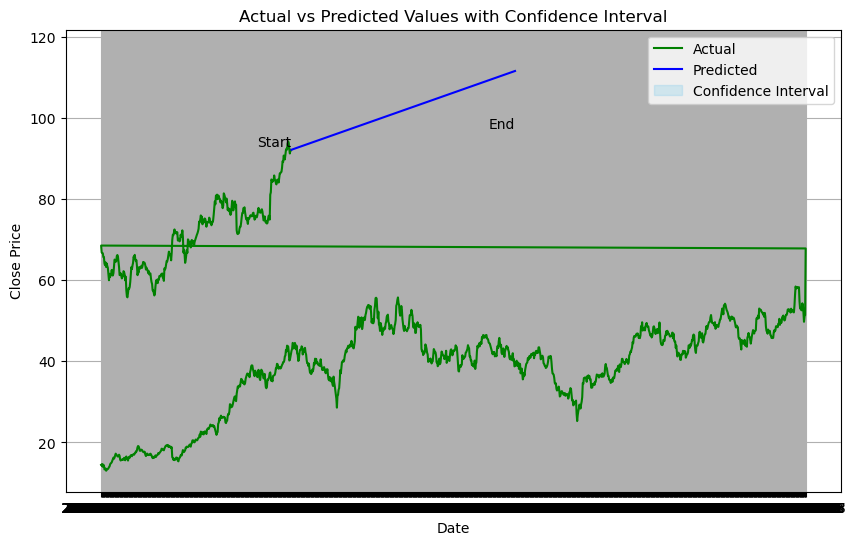

In [96]:
# Plot actual and predicted values with confidence interval
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(train_data.index, train_data['close'], label='Actual', color='green')

# Plot predicted values
plt.plot(test_data.index, predictions, label='Predicted', color='blue')

# Highlight confidence interval using shaded area
plt.fill_between(test_data.index, predictions - std_dev, predictions + std_dev, color='skyblue', alpha=0.3, label='Confidence Interval')

# Annotate start and end points
plt.text(test_data.index[0], test_data['close'].iloc[0], 'Start', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='black')
plt.text(test_data.index[-1], test_data['close'].iloc[-1], 'End', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='black')

# Add title and labels
plt.title('Actual vs Predicted Values with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# SARIMA MODEL IMPLEMENTATION

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


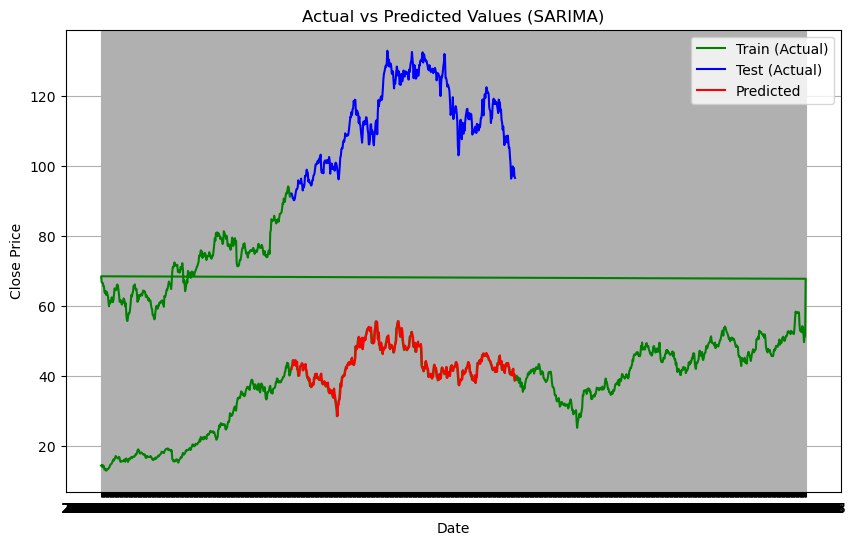

Mean Absolute Error (MAE): 69.75596697237182
Mean Squared Error (MSE): 4965.533791865954
Root Mean Squared Error (RMSE): 70.46654377692973


In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define seasonal ARIMA parameters
order = (1, 1, 1)  # Non-seasonal parameters (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters (P, D, Q, S)

# Fit SARIMA model
model = SARIMAX(train_data['close'], order=order, seasonal_order=seasonal_order)
sarima_model = model.fit()

# Generate predictions
predictions = sarima_model.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'], label='Train (Actual)', color='green')
plt.plot(test_data.index, test_data['close'], label='Test (Actual)', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test_data['close'], predictions)
mse = mean_squared_error(test_data['close'], predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
